In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# create data set
np.random.seed(1)
X_min, X_max = 4, 30
N = 16
X = 5 + 25 * np.random.rand(N)
par = [170, 108, 0.2]

T = par[0] - par[1] * np.exp(-par[2] * X)\
    + 4 * np.random.randn(N)

plt.plot(X, T, "o", color="cornflowerblue", markeredgecolor="black")
plt.grid()
plt.xlabel("age", fontsize=14)
plt.ylabel("height", fontsize=14)
plt.xlim(X_min, X_max)

NameError: name 'np' is not defined

In [23]:
def mse_line(x, t, w):
    y = w[0]*x + w[1]
    mse = np.mean((y-t)**2)
    return mse

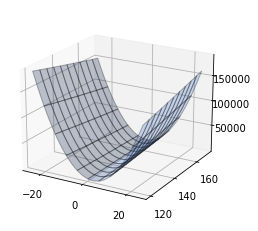

In [34]:
w0n, w1n = 100, 100
w0_min, w0_max = -25, 25
w1_min, w1_max = 120, 170

w0 = np.linspace(w0_min, w0_max, w0n)
w1 = np.linspace(w1_min, w1_max, w1n)

J = np.zeros((w1n, w0n)) 

for w0i in range(w0n):
    for w1i in range(w1n):
        w = np.array([w0[w0i], w1[w1i]])
        J[w1i, w0i] = mse_line(x, T, w)
    
ww0, ww1 = np.meshgrid(w0, w1) #グリッド座標

plt.figure(figsize=(9.5,4))
ax = plt.subplot(projection="3d")
ax.plot_surface(
    ww0, ww1, J,
    rstride=10, cstride=10,
    alpha=0.3, color="cornflowerblue", edgecolor="black",
)

ax.view_init(20, -60)
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])

# 2次元入力の面モデル

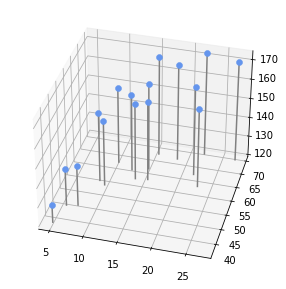

In [36]:
X0 = X
X1 = 23*(T/100)**2 + 2*np.random.randn(N)
X0_min, X0_max = 5, 30
X1_min, X1_max = 40, 75

def show_data2d(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot( #データ線の下の直線
            [x0[i], x0[i]],
            [x1[i], x1[i]],
            [120, t[i]],
            color="gray",
        )
    ax.plot( #データ点
        x0, 
        x1,
        t,
        color="cornflowerblue",
        marker="o",
        linestyle="None",
        markersize=6,
        markeredgewidth=0.5,
    )
    ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6,5))
ax = plt.subplot(projection="3d")
show_data2d(ax, X0, X1, T)
plt.show()

In [22]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 